# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


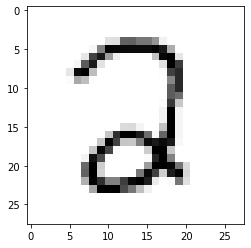

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2408165075814093
train accuracy is: 0.671507260891337, test accuracy is 0.6587701612903226


Epoch 10 Loss 0.10925693279238112
train accuracy is: 0.9034384910699382, test accuracy is 0.9122983870967742


Epoch 20 Loss 0.06302801505295227
train accuracy is: 0.9364880654314806, test accuracy is 0.9475806451612904


Epoch 30 Loss 0.047902750642819444
train accuracy is: 0.9485895509931564, test accuracy is 0.9591733870967742


Epoch 40 Loss 0.04079175417115225
train accuracy is: 0.9540143548656318, test accuracy is 0.9647177419354839


Epoch 50 Loss 0.036651458231705236
train accuracy is: 0.9585211150058421, test accuracy is 0.9657258064516129


Epoch 60 Loss 0.03385060089336601
train accuracy is: 0.9616925388082124, test accuracy is 0.969758064516129


Epoch 70 Loss 0.03178445739385104
train accuracy is: 0.9628609581038224, test accuracy is 0.9702620967741935


Epoch 80 Loss 0.030157561415841846
train accuracy is: 0.9643632114838925, test accuracy is 0.969758064516129


Epoch 90 Loss 0.028821067589570485
train accuracy is: 0.9664496745117677, test accuracy is 0.9707661290322581


Epoch 100 Loss 0.02769981491463528
train accuracy is: 0.9672842597229178, test accuracy is 0.9717741935483871


Epoch 110 Loss 0.026728325058380763
train accuracy is: 0.9688699716241028, test accuracy is 0.9722782258064516


Epoch 120 Loss 0.025877782882690572
train accuracy is: 0.9702053079619429, test accuracy is 0.9722782258064516


Epoch 130 Loss 0.025117650880805305
train accuracy is: 0.971039893173093, test accuracy is 0.9717741935483871


Epoch 140 Loss 0.024430610256571263
train accuracy is: 0.9721248539475881, test accuracy is 0.9722782258064516


Epoch 150 Loss 0.023802389121198177
train accuracy is: 0.9725421465531631, test accuracy is 0.9722782258064516


Epoch 160 Loss 0.023229880483791203
train accuracy is: 0.9732098147220831, test accuracy is 0.9717741935483871


Epoch 170 Loss 0.022689597518771178
train accuracy is: 0.9736271073276581, test accuracy is 0.9722782258064516


Epoch 180 Loss 0.022188509543233387
train accuracy is: 0.9739609414121182, test accuracy is 0.9717741935483871


Epoch 190 Loss 0.02171675672336465
train accuracy is: 0.9745451510599232, test accuracy is 0.9722782258064516


Epoch 200 Loss 0.02126276448748108
train accuracy is: 0.9752128192288433, test accuracy is 0.9727822580645161


Epoch 210 Loss 0.020832283672251765
train accuracy is: 0.9760474044399933, test accuracy is 0.9732862903225806


Epoch 220 Loss 0.020416487122185887
train accuracy is: 0.9765481555666834, test accuracy is 0.9737903225806451


Epoch 230 Loss 0.020011042338534468
train accuracy is: 0.9769654481722584, test accuracy is 0.9737903225806451


Epoch 240 Loss 0.01962093341888913
train accuracy is: 0.9772992822567184, test accuracy is 0.9742943548387096


0.0035950478649508523

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.22209295677156066
train accuracy is: 0.7623101318644634, test accuracy is 0.7746975806451613


Epoch 10 Loss 0.10128569082708332
train accuracy is: 0.9122016357870139, test accuracy is 0.9163306451612904


Epoch 20 Loss 0.07842148741305914
train accuracy is: 0.9298948422633951, test accuracy is 0.9354838709677419


Epoch 30 Loss 0.06761764603660193
train accuracy is: 0.9375730262059756, test accuracy is 0.9445564516129032


Epoch 40 Loss 0.061077865055488206
train accuracy is: 0.9419963278250709, test accuracy is 0.952116935483871


Epoch 50 Loss 0.05661464212168906
train accuracy is: 0.9451677516274412, test accuracy is 0.9546370967741935


Epoch 60 Loss 0.05333741223305886
train accuracy is: 0.9471707561342013, test accuracy is 0.954133064516129


Epoch 70 Loss 0.05080909899525775
train accuracy is: 0.9478384243031214, test accuracy is 0.9551411290322581


Epoch 80 Loss 0.048784784370613746
train accuracy is: 0.9504256384576866, test accuracy is 0.9571572580645161


Epoch 90 Loss 0.04711888451302353
train accuracy is: 0.9522617259222167, test accuracy is 0.9591733870967742


Epoch 100 Loss 0.04571615593780433
train accuracy is: 0.9530128526122517, test accuracy is 0.9596774193548387


Epoch 110 Loss 0.04451594347469171
train accuracy is: 0.9540978133867468, test accuracy is 0.9621975806451613


Epoch 120 Loss 0.043472209347680486
train accuracy is: 0.9547654815556669, test accuracy is 0.9637096774193549


Epoch 130 Loss 0.0425549855347551
train accuracy is: 0.9556000667668169, test accuracy is 0.9642137096774194


Epoch 140 Loss 0.04173870162499612
train accuracy is: 0.9562677349357369, test accuracy is 0.9637096774193549


Epoch 150 Loss 0.04100726778149724
train accuracy is: 0.956685027541312, test accuracy is 0.9637096774193549


Epoch 160 Loss 0.040346655098127154
train accuracy is: 0.957185778668002, test accuracy is 0.9642137096774194


Epoch 170 Loss 0.039744700608727965
train accuracy is: 0.9579369053580371, test accuracy is 0.9647177419354839


Epoch 180 Loss 0.03919487906998744
train accuracy is: 0.9585211150058421, test accuracy is 0.9657258064516129


Epoch 190 Loss 0.03868921643389773
train accuracy is: 0.9595226172592222, test accuracy is 0.9662298387096774


Epoch 200 Loss 0.038221871844618255
train accuracy is: 0.9598564513436821, test accuracy is 0.9662298387096774


Epoch 210 Loss 0.037787955073506185
train accuracy is: 0.9603572024703723, test accuracy is 0.9662298387096774


Epoch 220 Loss 0.03738389298383678
train accuracy is: 0.9606075780337172, test accuracy is 0.9662298387096774


Epoch 230 Loss 0.03700644811274499
train accuracy is: 0.9609414121181773, test accuracy is 0.9667338709677419


Epoch 240 Loss 0.03665272347768729
train accuracy is: 0.9610248706392923, test accuracy is 0.9662298387096774


0.018890741782942585

### Comparing results of NN and LR

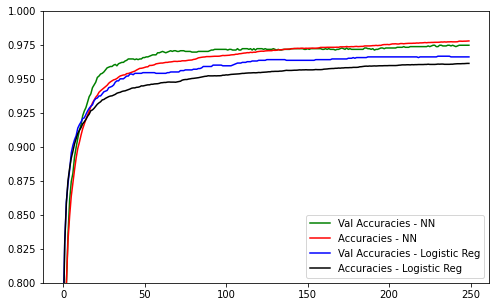

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

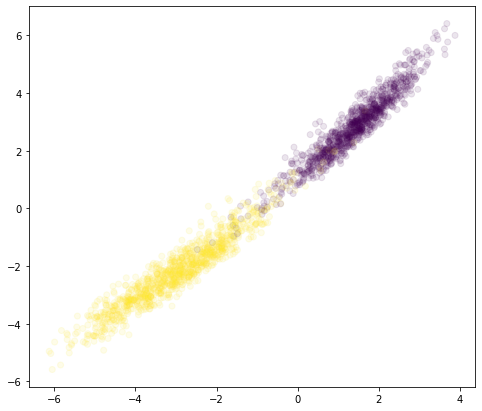

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

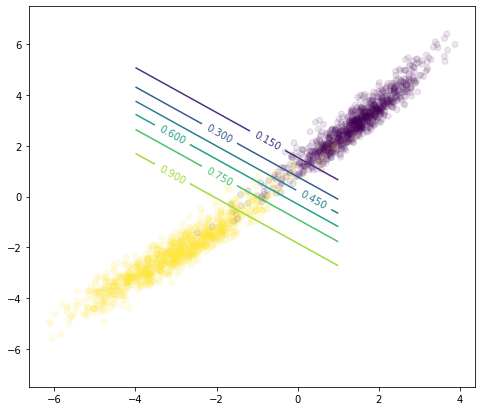

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );